In [2]:
from sympy import *
init_printing()
from IPython.display import display

%matplotlib inline

import matplotlib.pyplot as plt

# Equation for Neuron Paper

      A dendritic segment can robustly classify a pattern by subsampling a small number of cells from a larger population.  Assuming a random distribution of patterns, the exact probability of a false match is given by the following equation:


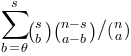

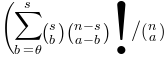

In [23]:
oxp = Symbol("Omega_x'")
b = Symbol("b")
n = Symbol("n")
theta = Symbol("theta")
s = Symbol("s")
a = Symbol("a")

subsampledOmega = (binomial(s, b) * binomial(n - s, a - b)) / binomial(n, a)
subsampledFpF = Sum(subsampledOmega, (b, theta, s))
subsampledOmegaSlow = (binomial(s, b) * binomial(n - s, a - b)) 
subsampledFpFSlow = Sum(subsampledOmegaSlow, (b, theta, s))/ binomial(n, a)

display(subsampledFpF)
display(subsampledFpFSlow)

where n refers to the size of the population of cells, a is the number of active cells at any instance in time, s is the number of actual synapses on a dendritic segment, and θ is the threshold for NMDA spikes. Following   (Ahmad & Hawkins, 2015), the numerator counts the number of possible ways θ or more cells can match a fixed set of s synapses. The denominator counts the number of ways a cells out of n can be active. 
    
## Example usage

In [4]:
display("n=10000, a=64, s=24, theta=12", subsampledFpF.subs(s,24).subs(n, 10000).subs(a, 64).subs(theta, 12).evalf())

'n=10000, a=64, s=24, theta=12'

In [5]:
display("n=10000, a=300, s=24, theta=12", subsampledFpFSlow.subs(theta, 12).subs(s, 24).subs(n, 10000).subs(a, 300).evalf())

'n=10000, a=300, s=24, theta=12'

In [64]:
display("n=2000, a=40, s=20, theta=10", subsampledFpF.subs(theta, 15).subs(s, 20).subs(n, 2000).subs(a, 40).evalf(100))

'n=2000, a=40, s=20, theta=10'

## Table 1B

In [7]:
T1B = subsampledFpFSlow.subs(n, 100000).subs(a, 2000).subs(theta,s).evalf()
print "n=100000, a=2000, theta=s"
display("s=6",T1B.subs(s,6).evalf())
display("s=8",T1B.subs(s,8).evalf())
display("s=10",T1B.subs(s,10).evalf())

n=100000, a=2000, theta=s


's=6'

's=8'

's=10'

## Table 1C

In [8]:
T1C = subsampledFpFSlow.subs(n, 100000).subs(a, 2000).subs(s,2*theta).evalf()
print "n=10000, a=300, s=2*theta"
display("theta=6",T1C.subs(theta,6).evalf())
display("theta=8",T1C.subs(theta,8).evalf())
display("theta=10",T1C.subs(theta,10).evalf())
display("theta=12",T1C.subs(theta,12).evalf())

n=10000, a=300, s=2*theta


'theta=6'

'theta=8'

'theta=10'

'theta=12'

## Table 1D

In [9]:
m = Symbol("m")
T1D = subsampledFpF.subs(n, 100000).subs(a, 2000).subs(s,2*m*theta).evalf()
print "n=100000, a=2000, s=2*m*theta"
display("theta=10, m=2",T1D.subs(theta,10).subs(m,2).evalf())
display("theta=10, m=4",T1D.subs(theta,10).subs(m,4).evalf())
display("theta=10, m=6",T1D.subs(theta,10).subs(m,6).evalf())
display("theta=20, m=6",T1D.subs(theta,20).subs(m,6).evalf())

n=100000, a=2000, s=2*m*theta


'theta=10, m=2'

'theta=10, m=4'

'theta=10, m=6'

'theta=20, m=6'

# Charts for SDR Paper

      The following sections calculates the numbers for some of the SDR paper charts.
      

## Importance of large n


In [10]:
eq1 = subsampledFpFSlow.subs(s, 64).subs(theta, 12)
print "a=64 cells active, s=16 synapses on segment, dendritic threshold is theta=8\n"
errorList = []
nList = []
for n0 in range(300,20100,200):
    error = eq1.subs(n, n0).subs(a,64).evalf()
    errorList += [error]
    nList += [n0]
    print "population n = %5d, sparsity = %5.2f%%, probability of false match = "%(n0, 64/n0), error
    
print errorList
print nList

a=64 cells active, s=16 synapses on segment, dendritic threshold is theta=8

population n =   300, sparsity =  0.00%, probability of false match =  0.767798046805888
population n =   500, sparsity =  0.00%, probability of false match =  0.0960845416487165
population n =   700, sparsity =  0.00%, probability of false match =  0.00881793984023789
population n =   900, sparsity =  0.00%, probability of false match =  0.00104201059477680
population n =  1100, sparsity =  0.00%, probability of false match =  0.000161866998734267
population n =  1300, sparsity =  0.00%, probability of false match =  3.16121753895779e-5
population n =  1500, sparsity =  0.00%, probability of false match =  7.42838135168482e-6
population n =  1700, sparsity =  0.00%, probability of false match =  2.02810556367455e-6
population n =  1900, sparsity =  0.00%, probability of false match =  6.26296994067198e-7
population n =  2100, sparsity =  0.00%, probability of false match =  2.14288245865589e-7
population n = 

population n = 18300, sparsity =  0.00%, probability of false match =  3.20589141787563e-18
population n = 18500, sparsity =  0.00%, probability of false match =  2.81791726811520e-18
population n = 18700, sparsity =  0.00%, probability of false match =  2.48029502476245e-18
population n = 18900, sparsity =  0.00%, probability of false match =  2.18605753401716e-18
population n = 19100, sparsity =  0.00%, probability of false match =  1.92926033086935e-18
population n = 19300, sparsity =  0.00%, probability of false match =  1.70482308095028e-18
population n = 19500, sparsity =  0.00%, probability of false match =  1.50839688859563e-18
population n = 19700, sparsity =  0.00%, probability of false match =  1.33625304613249e-18
population n = 19900, sparsity =  0.00%, probability of false match =  1.18518959085345e-18
[0.767798046805888, 0.0960845416487165, 0.00881793984023789, 0.00104201059477680, 0.000161866998734267, 3.16121753895779e-5, 7.42838135168482e-6, 2.02810556367455e-6, 6.262

## Small sparsity is insufficient

In [11]:
print ("2% sparsity with n=400")
print subsampledFpFSlow.subs(s, 4).subs(a, 8).subs(theta, 2).subs(n,400).evalf()
print ("2% sparsity with n=4000")
print subsampledFpFSlow.subs(s, 4).subs(a, 400).subs(theta, 2).subs(n,4000).evalf()


2% sparsity with n=400
0.00206314616966578
2% sparsity with n=4000
0.0522148720308419


## A small subsample can be very reliable (but not too small)

In [12]:
eq2 = subsampledFpFSlow.subs(n, 10000).subs(a, 300)
print "a=200 cells active out of population of n=10000 cells\n"
errorList = []
sList = []
for s0 in range(2,31,1):
    print "synapses s = %3d, theta = s/2 = %3d, probability of false match = "%(s0,s0/2), eq2.subs(s, s0).subs(theta,s0/2).evalf() 
    errorList += [eq2.subs(s, s0).subs(theta,s0/2).evalf()]
    sList += [s0]
    
print errorList
print sList



a=200 cells active out of population of n=10000 cells

synapses s =   2, theta = s/2 =   1, probability of false match =  0.0591029102910291
synapses s =   3, theta = s/2 =   1, probability of false match =  0.0873354694941389
synapses s =   4, theta = s/2 =   2, probability of false match =  0.00517101241148655
synapses s =   5, theta = s/2 =   2, probability of false match =  0.00844794620736664
synapses s =   6, theta = s/2 =   3, probability of false match =  0.000499865412306804
synapses s =   7, theta = s/2 =   3, probability of false match =  0.000855357919350205
synapses s =   8, theta = s/2 =   4, probability of false match =  5.05282906751424e-5
synapses s =   9, theta = s/2 =   4, probability of false match =  8.88044155296650e-5
synapses s =  10, theta = s/2 =   5, probability of false match =  5.23462085992797e-6
synapses s =  11, theta = s/2 =   5, probability of false match =  9.36152430040881e-6
synapses s =  12, theta = s/2 =   6, probability of false match =  5.504677

## Impact of noise on false negatives

In [98]:
b = Symbol("b")
v = Symbol("v")
theta = Symbol("theta")
s = Symbol("s")
a = Symbol("a")

overlapSetNoise = (binomial(s, b) * binomial(a - s, v - b)) / binomial(a, v)
noiseFN = Sum(overlapSetNoise, (b, s-theta+1, s))

In [99]:
eqn = noiseFN.subs(s, 30).subs(a, 128)
print "a=128 cells active with segment containing s=30 synapses (n doesn't matter here)\n"
for t in range(8,20,4):
    print "theta = ",t
    errorList = []
    noiseList = []
    noisePct = 0.05
    while noisePct <= 0.85:
        noise = int(round(noisePct*128,0))
        errorList += [eqn.subs(v, noise).subs(theta,t).evalf()]
        noiseList += [noise/128.0]
        noisePct += 0.05
    print errorList
    print noiseList


a=128 cells active with segment containing s=30 synapses (n doesn't matter here)

theta =  8
[0, 0, 0, 3.11341516283240e-16, 2.23243424464799e-12, 7.90168637530306e-10, 1.20695707971664e-7, 3.45576265561118e-6, 8.08202472708491e-5, 0.000735429456875121, 0.00464043435771348, 0.0268657157114204, 0.0896352007201254, 0.263952754229579, 0.508714577385333, 0.770861966941236]
[0.046875, 0.1015625, 0.1484375, 0.203125, 0.25, 0.296875, 0.3515625, 0.3984375, 0.453125, 0.5, 0.546875, 0.6015625, 0.6484375, 0.703125, 0.75, 0.796875]
theta =  12
[0, 0, 2.48810797387309e-15, 7.92695349343630e-10, 2.16302525195240e-7, 1.09248135880715e-5, 0.000314435369055385, 0.00279559866084888, 0.0198782675563797, 0.0716985160403564, 0.190430462690358, 0.426525969583828, 0.664766152465367, 0.880922510721824, 0.970339402698393, 0.996376835285247]
[0.046875, 0.1015625, 0.1484375, 0.203125, 0.25, 0.296875, 0.3515625, 0.3984375, 0.453125, 0.5, 0.546875, 0.6015625, 0.6484375, 0.703125, 0.75, 0.796875]
theta =  16
[0, 0,

# Impact of noise on first-order TMs trained on one sequence
We assume that false positives are impossible -- this is in fact not strictly true, but the number of segments is so low that it might as well be.

In [105]:
c = Symbol("c")
eqn = noiseFN*c
eqn = eqn.subs(s, 24).subs(a, 40).subs(c, 40)
for t in range(8, 20, 4):
    print "theta = ",t
    errorList = []
    jaccardSimilarityList = []
    noiseList = []
    noisePct = 0.05
    while noisePct <= 0.85:
        noise = int(round(noisePct*40,0))
        error = eqn.subs(v, noise).subs(theta,t).evalf()
        errorList.append(error)
        jaccardSimilarity = 40 - error
        jaccardSimilarityList.append(jaccardSimilarity)
        noiseList += [noise/40.0]
        noisePct += 0.05
    print errorList
    print jaccardSimilarityList
    print noiseList

theta =  8
[0, 0, 0, 0, 0, 0, 0, 0, 0.00200114549391524, 0.0611289821523414, 0.628630410165449, 3.33700107226247, 10.8112116565954, 23.1837176442293, 34.7555495942593, 39.6174636174636]
[40, 40, 40, 40, 40, 40, 40, 40, 39.9979988545061, 39.9388710178477, 39.3713695898346, 36.6629989277375, 29.1887883434046, 16.8162823557707, 5.24445040574073, 0.382536382536379]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
theta =  12
[0, 0, 0, 0, 0, 0, 0.0722190488597608, 1.05316885294638, 5.39733237130345, 14.9505456513243, 26.9629317860686, 35.8146756322507, 39.3684674663540, 39.9806391486036, 40.0000000000000, 40.0000000000000]
[40, 40, 40, 40, 40, 40, 39.9277809511402, 38.9468311470536, 34.6026676286966, 25.0494543486757, 13.0370682139314, 4.18532436774928, 0.631532533645995, 0.0193608513964492, 0, 0]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
theta =  16
[0, 0, 0, 0, 1.07973978941721, 7.23266091452966, 19.037

# Charts for BAMI

In [15]:
w0 = 32
print "a=%d cells active, s=%d synapses on segment, dendritic threshold is s/2\n" % (w0,w0)
errorList = []
nList = []
for n0 in range(50,500,50):
    w0 = n0/2
    eq1 = subsampledFpFSlow.subs(s, w0).subs(theta, w0/2)
    error = eq1.subs(n, n0).subs(a,w0).evalf()
    errorList += [error]
    nList += [n0]
    print "population n = %5d, sparsity = %7.4f%%, probability of false match = "%(n0, float(w0)/n0), error
    
print errorList
print nList

a=32 cells active, s=32 synapses on segment, dendritic threshold is s/2

population n =    50, sparsity =  0.5000%, probability of false match =  0.713930783595416
population n =   100, sparsity =  0.5000%, probability of false match =  0.579192330580665
population n =   150, sparsity =  0.5000%, probability of false match =  0.627949560779490
population n =   200, sparsity =  0.5000%, probability of false match =  0.556207787852021
population n =   250, sparsity =  0.5000%, probability of false match =  0.599827556589778
population n =   300, sparsity =  0.5000%, probability of false match =  0.545950866779313
population n =   350, sparsity =  0.5000%, probability of false match =  0.584632630831763
population n =   400, sparsity =  0.5000%, probability of false match =  0.539819496834182
population n =   450, sparsity =  0.5000%, probability of false match =  0.574768441538204
[0.713930783595416, 0.579192330580665, 0.627949560779490, 0.556207787852021, 0.599827556589778, 0.5459508667

# Union Property Math
Here, we calculate the expected error rates for unions of various sizes, with varying dimensions and sparsities.
This is used in plots for the Neuron paper.

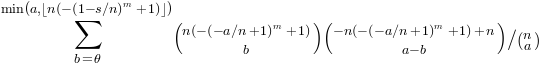

In [80]:
oxd = Symbol("omega")
n = Symbol("n")
a = Symbol("a")
b = Symbol("b")
theta = Symbol("theta")
s = Symbol("s")
m = Symbol("m")
q = Symbol("q")

p = (1 - a/n) ** m
ss = Min(floor((1 - (1 - s/n)**m)*n), a)

expectedUnionOverlap =  binomial(((1 - p)*n), b) * binomial(((n - (1 - p)*n)), a - b) / binomial(n, a)
expectedUnionFP = Sum(expectedUnionOverlap, (b, theta, ss))

display(expectedUnionFP)

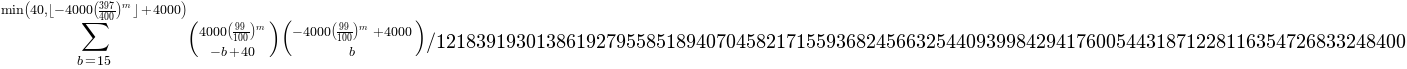

0 0
1 0.000000000000000000001745032216871438090517748709430240184404544869372092932990501764967163185476624815904215229805420692
2 0.0000000000000002093468685928811801989717729017516091277687796544570405122615488775764198833250143098252085743081943
3 0.0000000000001091758776979344433495190028335131313256945573398716353241939392444505507255409008113375381478068025
4 0.000000000007575918762457399263916640767599584844271471997036011048438470323012907960591826464196106810238596218
5 0.0000000001814421512098364828902010548712515048686609396337277833566447515902789676799747568196961072283645763
6 0.000000002248520791277327492290796623999930059599315117596382321155353679106977615017740475810202854920301505
7 0.00000001779329137132590681767775746815254927118928197200267985021165612640886614001871820394749448092383756
8 0.0000001017201482488728819151737506974190201700891964811656321916877721839928071431788182545666671963198185
9 0.0000004544626711472886148782943170010378460105169655813186634988

77 0.9877764191687382352383534482461674380666006092361971203131222241619976993001464394851327403347093105
78 0.9895334514652770049351198347995324068523855808454712028753433625484081358747015143997724544504526845
79 0.9910542412196127245337801988992223612195487608770100340584761329462040924816073494061352353110232106
80 0.9923676781685507831526238169433784339581429974257310402040376110327444999224991375727143121084570650
81 0.9934996213177341207837883983824516459156879677833018409671054234938498452708213865624058175877877541
82 0.9944731284312372554882786883027545562141789160102251911001730313959734035376089588769996400239866457
83 0.9953086846717898248154035259209731229520164769060767031978750291161019209916255454917934987601853862
84 0.9960244264525096178182786147639477123155637939690783729706869631843378530263639379836609144271136632
85 0.9966363574610358252879871267727517371974455461212525351132912722595162727442490825560745508869166798
86 0.99715855459978144748785619501106355551780

In [92]:
eq1 = expectedUnionFP.subs(a, 40).subs(n, 4000).subs(theta, 15).subs(s, 30)
display(eq1)

for num_patterns in range(100):
    eq2 = eq1.subs(m, num_patterns)
    #display(eq2)
    error_prob = eq2.evalf(100)
    print num_patterns, error_prob

In [95]:
eq1 = p.subs(a, 40).subs(n, 4000)
for num_patterns in range(100):
    expected_distinct = eq1.subs(m, num_patterns).evalf(10)
    print num_patterns, expected_distinct, (1 - expected_distinct)

0 1.000000000 0
1 0.9900000000 0.01000000000
2 0.9801000000 0.01990000000
3 0.9702990000 0.02970100000
4 0.9605960100 0.03940399000
5 0.9509900499 0.04900995010
6 0.9414801494 0.05851985060
7 0.9320653479 0.06793465209
8 0.9227446944 0.07725530557
9 0.9135172475 0.08648275251
10 0.9043820750 0.09561792499
11 0.8953382543 0.1046617457
12 0.8863848717 0.1136151283
13 0.8775210230 0.1224789770
14 0.8687458128 0.1312541872
15 0.8600583546 0.1399416454
16 0.8514577711 0.1485422289
17 0.8429431934 0.1570568066
18 0.8345137615 0.1654862385
19 0.8261686238 0.1738313762
20 0.8179069376 0.1820930624
21 0.8097278682 0.1902721318
22 0.8016305895 0.1983694105
23 0.7936142836 0.2063857164
24 0.7856781408 0.2143218592
25 0.7778213594 0.2221786406
26 0.7700431458 0.2299568542
27 0.7623427143 0.2376572857
28 0.7547192872 0.2452807128
29 0.7471720943 0.2528279057
30 0.7397003734 0.2602996266
31 0.7323033697 0.2676966303
32 0.7249803360 0.2750196640
33 0.7177305326 0.2822694674
34 0.7105532273 0.28944677